In [ ]:
from utils import *
from prettytable import PrettyTable
import matplotlib.pyplot as plt
%matplotlib inline

<h1><center>Section 2. Behavioral Cloning</center></h1>

### Train BC Agent

In [ ]:
for j in ['Walker2d-v2','Ant-v2','HalfCheetah-v2', 'Hopper-v2', 'Humanoid-v2', 'Reacher-v2']:
    train_model(name=j)

### Evaluate Behavior Cloning

In [11]:
model_results = {}
for i in game_shapes.keys():
    model_results[i]= evaluate_model(envname=i,num_rollouts=3)

loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./bc_experts/Hopper-v2.ckpt
loaded and built
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
iter 0
iter 1000
iter 2000
loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./bc_experts/Reacher-v2.ckpt
loaded and built
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
iter 0
iter 1
iter 2
loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./bc_experts/Ant-v2.ckpt
loaded and built
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float3

### Evaluate expert

In [12]:
expert_results = {}
for i in game_shapes.keys():
    expert_results[i]=evaluate_expert(envname=i,num_rollouts=3)

obs (1, 11) (1, 11)
loaded Hopper-v2 expert
Instructions for updating:
Please use tf.global_variables instead.
Instructions for updating:
Use `tf.variables_initializer` instead.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
iter 0
iter 1000
iter 2000
obs (1, 11) (1, 11)
loaded Reacher-v2 expert
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
iter 0
iter 1
iter 2
obs (1, 111) (1, 111)
loaded Ant-v2 expert
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
iter 0
iter 1000
iter 2000
obs (1, 17) (1, 17)
loaded Walker2d-v2 expert
WARN: gym.spaces.Bo

In [22]:
model_results
x = PrettyTable()
x.field_names = ['Environment','mean_BC','std_BC','mean_exp','std_exp']
for j in model_results.keys():
    x.add_row([j,model_results[j][1],model_results[j][2],expert_results[j][1],expert_results[j][2]])
print(x)

+----------------+---------------------+--------------------+--------------------+--------------------+
|  Environment   |       mean_BC       |       std_BC       |      mean_exp      |      std_exp       |
+----------------+---------------------+--------------------+--------------------+--------------------+
|   Hopper-v2    |   3520.19416101762  | 102.81228792949764 | 3778.1850013833246 | 1.1265700706730155 |
|   Reacher-v2   | -4.2155629013552725 | 2.1055430037020417 | -2.694071582942516 | 1.242724115427505  |
|     Ant-v2     |  3467.5233106292185 | 1979.587264217078  | 4873.587216989561  | 50.00077513782903  |
|  Walker2d-v2   |  5495.942427427292  | 39.304690028389246 | 5475.428331752418  | 30.38336684821029  |
|  Humanoid-v2   |  7791.851825247883  | 3645.515986188081  | 10407.066389171405 | 11.762353769537564 |
| HalfCheetah-v2 |  4219.228884278461  | 29.859502704504777 | 4123.927112860404  | 75.89389771623627  |
+----------------+---------------------+--------------------+---

<center><b>Table 1:</b> we can notce that the network worked very well for <b>HalfCheetah,Walker2d</b> but not for <b>Reacher</b> I used for both networks 2 layers with 64 hidden neuron and relu as activation function. The network was traiend for <b>100K</b> with batchsize <b>128</b> </center>
<b>Note:</b> that I tried for <b>Reacher-v2</b> different network sizes and different training durations, but in the end reported the one with same network I used for all of them since it didn't work on any of them).

### Change over networksize

In [78]:
for j in [2,4,8,16,32,64,128,256,512,1024]:
    train_model(name='Humanoid-v2',model_name='Humanoid-v2_{}'.format(j),iteration=5000,no_nodes=[j,j])

In [85]:
nodes=[2,4,8,16,32,64,128,256,512,1024]
means=[]
stds=[]
for j in nodes:
    result = evaluate_model(envname='Humanoid-v2',model_name='Humanoid-v2_{}'.format(j),no_nodes=[j,j],num_rollouts=10)
    means.append(result[1])
    stds.append(result[2])
    print(j,result[1],result[2])

loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./bc_experts/Humanoid-v2_2.ckpt
loaded and built
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
2 397.52518751074837 24.055817469346685
loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./bc_experts/Humanoid-v2_4.ckpt
loaded and built
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
4 250.43402368033975 14.801702529192786
loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./bc_experts/Humanoid-v2_

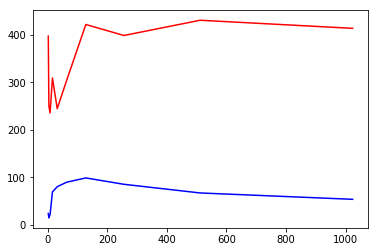

In [86]:
plt.plot(nodes,means,c='r')
plt.plot(nodes,stds,c='b')

<center><b>Figure 1:</b> we can notice that the network perform best with 1024 node. I choose number of nodes for the hidden layers for <b>Humanoid task</b> to see how the size of the network affect the results while doing small amount of iterations (5K). Which was nice to see that with low number of iteration the network size compensate
    </center>
Below I did another hyperparameter with 20K iteration

In [92]:
nodes=[2,4,8,16,32,64,128,256,512,1024]
means=[]
stds=[]
for j in nodes:
    result = evaluate_model(envname='HalfCheetah-v2',model_name='HalfCheetah-v2_{}'.format(j),no_nodes=[j,j],num_rollouts=20)
    means.append(result[1])
    stds.append(result[2])
    print(j,result[1],result[2])

loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./bc_experts/HalfCheetah-v2_2.ckpt
loaded and built
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
iter 0
iter 1000
iter 2000
iter 3000
iter 4000
iter 5000
iter 6000
iter 7000
iter 8000
iter 9000
iter 1000
iter 1100
iter 1200
iter 1300
iter 1400
iter 1500
iter 1600
iter 1700
iter 1800
iter 1900
2 1431.582987570743 698.7564813520625
loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./bc_experts/HalfCheetah-v2_4.ckpt
loaded and built
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
iter 0
iter 1000
iter 2000
iter 3000
iter 4000
iter 5000
iter 6000
iter 7000
iter 8000
iter

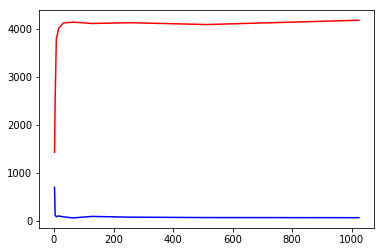

In [93]:
plt.plot(nodes,means,c='r')
plt.plot(nodes,stds,c='b')

<center><b>Figure 2:</b> we can notice that the network perform best with 1024 nodes for <b>Halfcheetah</b> task, trained for 20K iteration. But it performed less with 512 nodes (local minima says hi).    </center>

<h1><center>Section 3. DAgger</center></h1>

In [1]:
from utils import *
from prettytable import PrettyTable
import matplotlib.pyplot as plt
%matplotlib inline

envname='HalfCheetah-v2'

data_x,data_y = get_expert_data(envname,amount=1000)
iteration=1001
#Create the network
train_dag_model(data_x,data_y,name=envname,no_layers=2,no_nodes=[64,64],iteration=1000,create=True)
mean_list = []
std_list =[]
for i in range(60):
    #train the network on the data we have
    train_dag_model(data_x,data_y,name=envname,no_layers=2,no_nodes=[64,64],iteration=2000)
    #Generate new data
    new_x,r_mean,r_std = evaluate_dag(envname=envname,num_rollouts=3)
    mean_list.append(r_mean)
    std_list.append(r_std)
    #Get the expert opinion
    new_y = take_expert_opinion(envname,new_x)
    #merge data
    data_x = np.concatenate([data_x,new_x])
    data_y = np.concatenate([data_y,new_y])

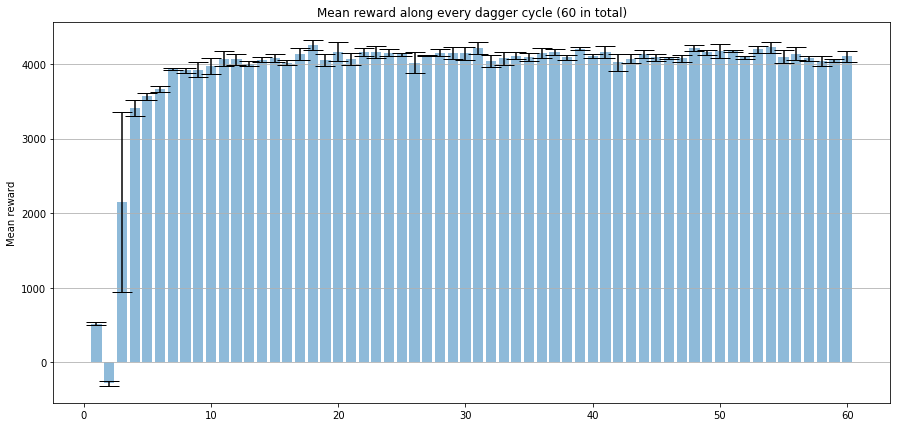

In [16]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.bar(range(1,61), mean_list, yerr=std_list, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean reward')
ax.set_xlabel('Dagger cycle')
ax.set_title('Mean reward along every dagger cycle (60 in total)')
ax.yaxis.grid(True)

# Save the figure and show
plt.show()


<center><b>Figure 3:</b> The task I used is Haflcheetah, The Behavior cloning acheived 4219.22 while Dagger acheived 4256 in best case. I used same network, two layers with 64 hidden nodes and relu activation function. Worth notice that dagger used 181 rollout in the end while I used 500 rollout for behavior cloning.</center>

In [19]:
from utils import *
from prettytable import PrettyTable
import matplotlib.pyplot as plt
%matplotlib inline

envname='Ant-v2'

data_x,data_y = get_expert_data(envname,amount=1000)
iteration=1001
#Create the network
train_dag_model(data_x,data_y,name=envname,no_layers=2,no_nodes=[64,64],iteration=1000,create=True)
mean_list = []
std_list =[]
for i in range(60):
    #train the network on the data we have
    train_dag_model(data_x,data_y,name=envname,no_layers=2,no_nodes=[64,64],iteration=2000)
    #Generate new data
    new_x,r_mean,r_std = evaluate_dag(envname=envname,num_rollouts=3)
    mean_list.append(r_mean)
    std_list.append(r_std)
    #Get the expert opinion
    new_y = take_expert_opinion(envname,new_x)
    #merge data
    data_x = np.concatenate([data_x,new_x])
    data_y = np.concatenate([data_y,new_y])

INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loaded and built
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
obs (1, 111) (1, 111)
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loaded and built
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
obs (1, 111) (1, 111)
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./dag_exp

obs (1, 111) (1, 111)
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loaded and built
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
obs (1, 111) (1, 111)
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loaded and built
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
obs (1, 111) (1, 111)
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loading and building behavior cloning policy
INFO:tensorflow:Restoring par

obs (1, 111) (1, 111)
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loaded and built
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
obs (1, 111) (1, 111)
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loaded and built
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
obs (1, 111) (1, 111)
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loading and building behavior cloning policy
INFO:tensorflow:Restoring par

obs (1, 111) (1, 111)
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loaded and built
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
obs (1, 111) (1, 111)
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loading and building behavior cloning policy
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loaded and built
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
obs (1, 111) (1, 111)
INFO:tensorflow:Restoring parameters from ./dag_experts/Ant-v2.ckpt
loading and building behavior cloning policy
INFO:tensorflow:Restoring par

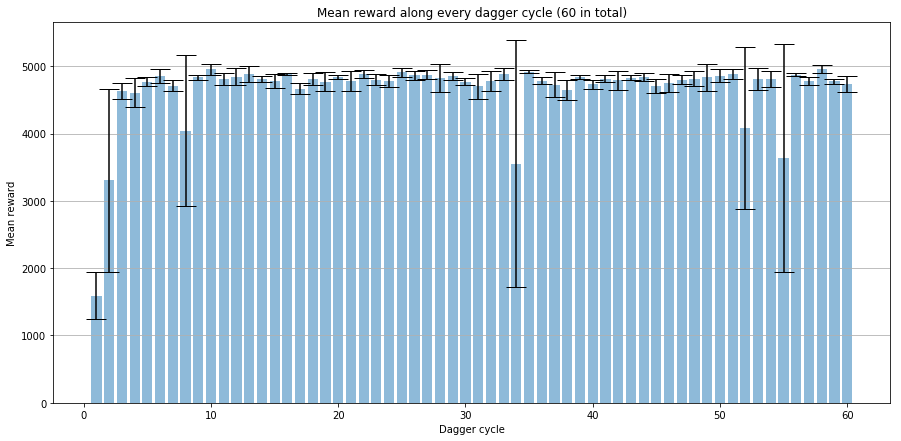

In [20]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.bar(range(1,61), mean_list, yerr=std_list, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean reward')
ax.set_xlabel('Dagger cycle')
ax.set_title('Mean reward along every dagger cycle (60 in total)')
ax.yaxis.grid(True)

# Save the figure and show
plt.show()

<center><b>Figure 4:</b> The task I used is <b>Ant-v2</b>, The Behavior cloning acheived 3467.52 while Dagger acheived 4960.75 in best case. I used same network, two layers with 64 hidden nodes and relu activation function. Worth notice that dagger used 181 rollout in the end while I used 500 rollout for behavior cloning.</center>